In [63]:
import numpy as np
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

In [64]:
def compute_gini(model) : 
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))

    return 1 + (1/N) - 2*B

In [65]:
class MoneyAgent(Agent):
    '''initial wealth'''

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth  = 1
    
    def move(self):
        possible_steps = self. model.grid.get_neighborhood(self.pos, moore = True, include_center = False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates)>1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1


    def step(self):
        self.move()
        if self. wealth > 0:
            self.give_money()
  
class MoneyModel(Model):
    '''model with some number of agents'''

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width,height, True)
        self.schedule = RandomActivation(self)
        # Create Agents
        for i in range(self.num_agents): 
            a = MoneyAgent(i, self)
            #print('Hi ! I am agent number ', i )
            self.schedule.add(a)

            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a,(x,y))

        self.datacollector = DataCollector(
            model_reporters={"Gini" : compute_gini},
            agent_reporters = {'Wealth': 'wealth'}
        )
    def step(self):
        '''advanced the model by one step'''
        self.schedule.step()

In [66]:
model = MoneyModel(50,10,10)
for i in range(20):
    model.step()

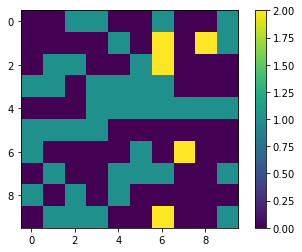

In [67]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x,y = cell 
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation= 'nearest')
plt.colorbar()
plt.show()

In [72]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()


In [73]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

<AxesSubplot:>

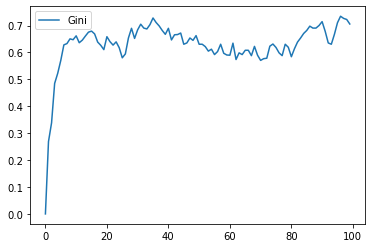

In [74]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [75]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

In [79]:
agent_wealth.iloc[0]

Wealth    1
Name: (0, 0), dtype: int64

<AxesSubplot:>

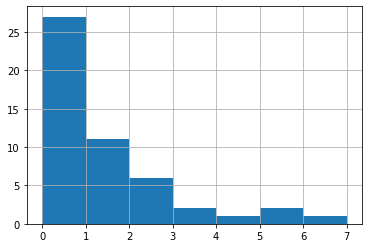

In [76]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max() + 1))

(array([22.,  0., 14.,  0.,  0.,  9.,  0.,  2.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

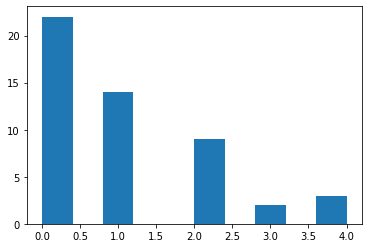

In [70]:
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

In [71]:
all_wealth = []
for j in range(100):
    model = MoneyModel(10)
    for i in range(10):
        model.step()
    
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins = range(max(all_wealth)+1))

TypeError: __init__() missing 2 required positional arguments: 'width' and 'height'